In [1]:
%config InlineBackend.figure_formats = ['svg']
import sys
sys.path.insert(1, '../')

import matplotlib.pyplot as plt
from os import path

from deployment_instance.Result import ExperimentResult
from src.ingest_data import ingest_experiment_results
from src.query_data import get_exfiltration_time_df, get_data_exfiltration_cdf, total_control_host_capture_times
from statistics import mean
import seaborn as sns
# set seaborn font size
sns.set_theme(font_scale=1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.color_palette("pastel")

import pandas as pd

In [2]:
# Data
data = {
    'Launch': [
        425.1, 447.1, 446.1, 453.6, 435.8,
        154.8, 149.4, 151.9, 149.9, 153.6,
        158.5, 144.1, 141, 150, 141,
        221.7, 211.6, 220.8, 217.3379433, 214.294714,
        212.1353958, 182.4004116, 179.3989351, 177.7602866, 177.6630113,
        63, 62.1, 62.61887383, 62.23279428, 62.95240879,
    ],
    'Environment': ['Equifax', 'Equifax', 'Equifax', 'Equifax', 'Equifax',
                    'ICS', 'ICS', 'ICS', 'ICS', 'ICS',
                    'Chain', 'Chain', 'Chain', 'Chain', 'Chain',
                    'Star', 'Star', 'Star', 'Star', 'Star',
                    'Dumbbell', 'Dumbbell', 'Dumbbell', 'Dumbbell', 'Dumbbell',
                    'Enterprise', 'Enterprise', 'Enterprise', 'Enterprise', 'Enterprise',],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert Setup time from seconds to minutes
df['Launch'] = df['Launch'] / 60

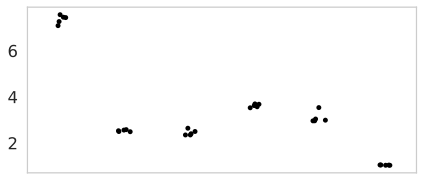

In [3]:
# Create a stripplot
plt.figure(figsize=(7, 3))
sns.stripplot(x='Environment', y='Launch', data=df, jitter=True, color='black')

# Hide x and y axis labels
plt.xlabel('')
plt.ylabel('')

# Hide x ticks
plt.xticks([])

# Save as SVG file
plt.savefig('plots/launch_time.svg', format='svg', bbox_inches='tight')

In [4]:
data = {
    'Setup': [5220.85319, 5826.672148, 3244.1, 3079, 3996.094548, 2127.156868],
    'Environment': ['Equifax', 'ICS', 'Chain', 'Star', 'Dumbbell', 'Enterprise']
}

# Create a DataFrame
df = pd.DataFrame(data)
df['Setup'] = df['Setup'] / 60

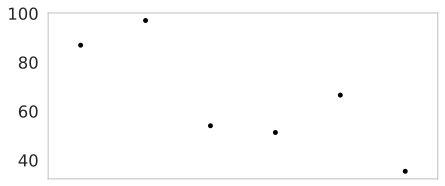

In [5]:
# Create a stripplot
plt.figure(figsize=(7, 3))
sns.stripplot(x='Environment', y='Setup', data=df, jitter=True, color='black')

# Hide x ticks
plt.xticks([])

# Hide x and y axis labels
plt.xlabel('')
plt.ylabel('')

plt.savefig('plots/setup_time.svg', format='svg', bbox_inches='tight')

In [6]:
data = {
    'strategy': ['dfs', 'equifax', 'targeted', 'persistent', 'darkside'],
    'perry_loc': [59, 94, 75, 69, 58],
    'action_loc': [856, 1424, 856, 1193, 1180],
    'obs_loc': [160, 267, 160, 205, 205],
    'env_loc': [24, 49, 24, 24, 27],
    'ag_loc': [156, 104, 156, 228, 89]
}

abs_df = pd.DataFrame(data)

# Add column, 'total' to the DataFrame
abs_df['total_loc'] = abs_df['perry_loc'] + abs_df['action_loc'] + abs_df['obs_loc'] + abs_df['env_loc'] + abs_df['ag_loc']

reduce_df = pd.DataFrame()
# Calculate reduction in number of lines of code
reduce_df['strategy'] = abs_df['strategy']
# reduce_df['total_reduction'] = df['total_loc'] / df['perry_loc']
reduce_df['action_reduction'] = abs_df['action_loc'] / abs_df['perry_loc']
reduce_df['obs_reduction'] = abs_df['obs_loc'] / abs_df['perry_loc']
reduce_df['ag_reduction'] = abs_df['ag_loc'] / abs_df['perry_loc']
reduce_df['env_reduction'] = abs_df['env_loc'] / abs_df['perry_loc']


/tmp/ipykernel_432596/127363791.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels([f'{int(tick)}x' for tick in y_ticks])


<Figure size 700x300 with 0 Axes>

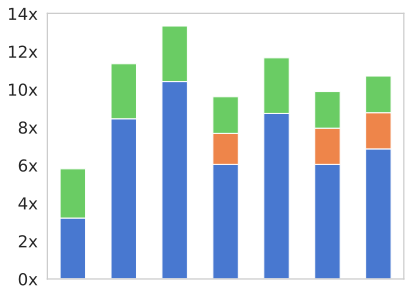

In [10]:
# Stacked bar plot
# Set pastel color palette
plt.figure(figsize=(7, 3))
sns.set_theme(font_scale=1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_palette("muted")

ax1 = reduce_df.plot(x='strategy', kind='bar', stacked=True, legend=False)

# Hide x ticks
ax1.set_xticks([])
ax1.set_xlabel('')

# Add 'x' to each y-axis tick
# Get y-axis tick labels
y_ticks = ax1.get_yticks()
# Add 'x' to each y-axis tick
ax1.set_yticklabels([f'{int(tick)}x' for tick in y_ticks])

# Add second y-axis
# ax2 = plt.twinx()
# ax2.set_ylim(0, abs_df['total_loc'].max())
# ax2.set_yticks(range(0, abs_df['total_loc'].max(), 500))

plt.savefig('plots/loc_attacker_reduction.svg', format='svg', bbox_inches='tight')


In [13]:
data = {
    'strategy': ['basic_honeypot', 'mixed', 'layered', 'simple_stateful', 'misleading_layered', 'advanced_mixed', 'advanced_layered'],
    'perry_loc': [37, 31, 29, 44, 30, 44, 44],
    'action_loc': [119, 262, 302,266, 262, 266, 302],
    'obs_loc': [0, 0, 0, 72, 0, 84, 84],
    'env_loc': [96, 90, 85, 85, 88, 85, 85],
    'ag_loc': [0, 0, 0, 0, 0, 0, 0]
}

abs_df = pd.DataFrame(data)

# Add column, 'total' to the DataFrame
abs_df['total_loc'] = abs_df['perry_loc'] + abs_df['action_loc'] + abs_df['obs_loc'] + abs_df['env_loc']

reduce_df = pd.DataFrame()
# Calculate reduction in number of lines of code
reduce_df['strategy'] = abs_df['strategy']
# reduce_df['total_reduction'] = df['total_loc'] / df['perry_loc']
reduce_df['action_reduction'] = abs_df['action_loc'] / abs_df['perry_loc']
reduce_df['obs_reduction'] = abs_df['obs_loc'] / abs_df['perry_loc']
reduce_df['ag_reduction'] = abs_df['ag_loc'] / abs_df['perry_loc']
reduce_df['env_reduction'] = abs_df['env_loc'] / abs_df['perry_loc']


/tmp/ipykernel_432596/3325761958.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels([f'{int(tick)}x' for tick in y_ticks])


<Figure size 700x300 with 0 Axes>

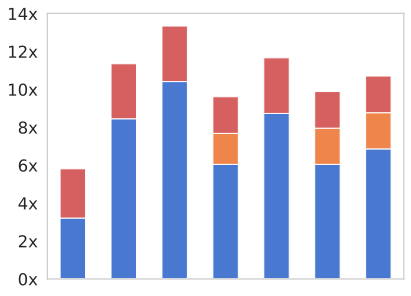

In [14]:
# Stacked bar plot
# Set pastel color palette
plt.figure(figsize=(7, 3))
sns.set_theme(font_scale=1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_palette("muted")

ax1 = reduce_df.plot(x='strategy', kind='bar', stacked=True, legend=False)

# Hide x ticks
ax1.set_xticks([])
ax1.set_xlabel('')

# Add 'x' to each y-axis tick
# Get y-axis tick labels
y_ticks = ax1.get_yticks()
# Add 'x' to each y-axis tick
ax1.set_yticklabels([f'{int(tick)}x' for tick in y_ticks])

# Add second y-axis
# ax2 = plt.twinx()
# ax2.set_ylim(0, abs_df['total_loc'].max())
# ax2.set_yticks(range(0, abs_df['total_loc'].max(), 500))

plt.savefig('plots/loc_defender_reduction.svg', format='svg', bbox_inches='tight')

In [38]:
# Equifax
attackers = ['equifax', 'dfs', 'darkside', 'targeted', 'persistent']
defenders = ['no deception', 'simple_honeypot', 'mixed', 'layered', 'simple_stateful']

matrix = [
    [100, 100, 100, 100, 100],
    [100, 100, 100, 93.3, 20],
    [100, 100, 100, 100, 60],
    [100, 100, 100, 100, 100],
    [100, 100, 100, 85.4, 60]
]

df = pd.DataFrame(matrix, index=attackers, columns=defenders)

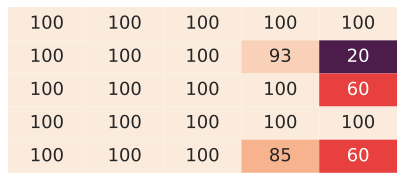

In [39]:
plt.figure(figsize=(7, 3))
sns.heatmap(df, annot=True, fmt=".0f", vmin=0, vmax=100, cbar=False)

plt.xticks([])
plt.yticks([])

plt.savefig('plots/equifax_heatmap.svg', format='svg', bbox_inches='tight')

In [37]:
# ICS
attackers = ['equifax', 'dfs', 'darkside', 'targeted', 'persistent']
defenders = ['no deception', 'simple_honeypot', 'mixed', 'layered', 'simple_stateful']

matrix = [
    [0, 0, 0, 0, 0],
    [100, 100, 100, 100, 60],
    [100, 100, 100, 100, 40],
    [100, 100, 100, 100, 20],
    [100, 100, 100, 100, 20]
]

df = pd.DataFrame(matrix, index=attackers, columns=defenders)

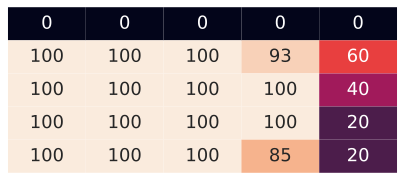

In [36]:
plt.figure(figsize=(7, 3))
sns.heatmap(df, annot=True, fmt=".0f", vmin=0, vmax=100, cbar=False)

plt.xticks([])
plt.yticks([])

plt.savefig('plots/ics_heatmap.svg', format='svg', bbox_inches='tight')